## AUTO REGRESSIVE Models

Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models. 

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods. 

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models. 

### Lags

Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

**White noise of the residuals:**

White noise is a process of residuals $\epsilon_t$ that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive  (AR) Models

Auto-Regression is a regression of a variable on itself measured at different time points. 
Auto-Regressive model with lag 1, AR(1) is given by 
* $Y_{t+1} = \beta Y_t + \epsilon_{t+1}$  and this same as
* $Y_{t+1} - \mu = \beta (Y_t - \mu) + \epsilon_{t+1}$  and this same as
* where $\epsilon_{t+1}$ is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation. 
 * $Y_{t+1} - \mu$ is interpreted as a deviation from mean value $mu$ and known as mean centered series.



The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. 
The null hypothesis is that time series is non-stationary.
Alternative hypothesis is that time series is stationary.

### AR Model indentification


### Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)

#### Autocorrelation Function (ACF)

**A plot of auto-correlation of different lags is called ACF.**

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

#### Partial Autocorrelation Function (PACF)

**A plot of partial auto-correlation for different values of lags is called PACF.**

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:
* The partial auto-correlation, |$\rho_{pk}$| > 1.96 / $\sqrt{n}$ for first p values and cuts off to zero. 
* The auto-correlation function, $\rho_k$ decreases exponentially.

*  The model is AR of order p when the PACF cuts-off after a lag p.

*  The model is MA of order p when the ACF cuts-off after a lag q.

*  The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

* For an **ARIMA (p,d,q)** process, it becomes non-stationary to stationary after differencing it for **d** times.

#### Import the necessary libraries.

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 5)
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#### Read the data set in a Time Series with proper Time frequency or period.

In [235]:
df1 = pd.read_csv('MaunaLoa.csv')
df1.tail()

,Year-Month,CO2 ppm
187,1980-Aug,337.19
188,1980-Sep,335.49
189,1980-Oct,336.63
190,1980-Nov,337.74
191,1980-Dec,338.36


In [236]:
df1['Date'] = pd.to_datetime(df1['Year-Month'], format='%Y-%b')
df1.set_index('Date', inplace=True)
df = df1[['CO2 ppm']]

In [237]:
df

,CO2 ppm
Date,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17
...,...
1980-08-01,337.19
1980-09-01,335.49
1980-10-01,336.63


### Plot the Time Series Data.

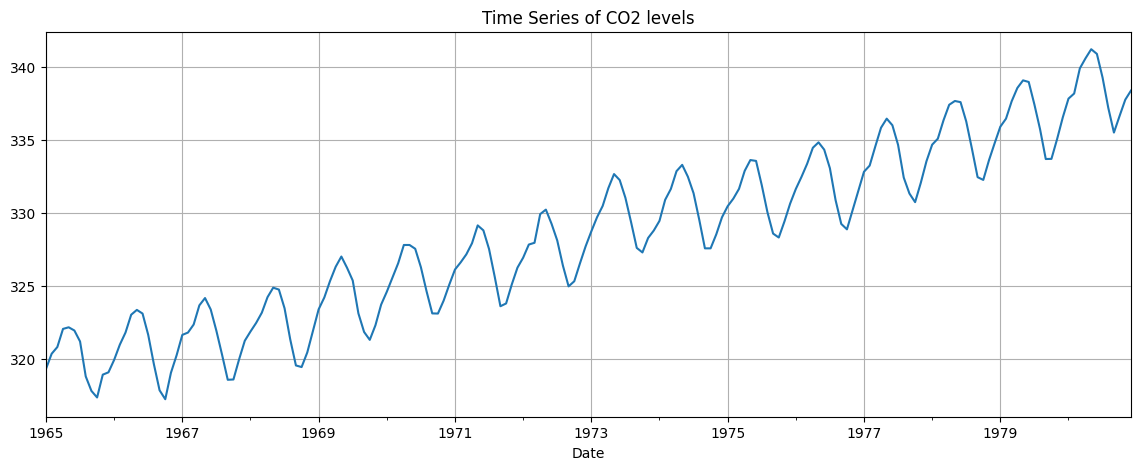

In [238]:

df['CO2 ppm'].plot(grid=True)
plt.title('Time Series of CO2 levels')
plt.show()

### Plot a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

In [239]:
df1['Month'] = df1['Year-Month'].str[-3:]
df1['Year'] = df1['Year-Month'].str[0:4]
df1.head()

,Year-Month,CO2 ppm,Month,Year
Date,,,,
1965-01-01,1965-Jan,319.32,Jan,1965
1965-02-01,1965-Feb,320.36,Feb,1965
1965-03-01,1965-Mar,320.82,Mar,1965
1965-04-01,1965-Apr,322.06,Apr,1965
1965-05-01,1965-May,322.17,May,1965


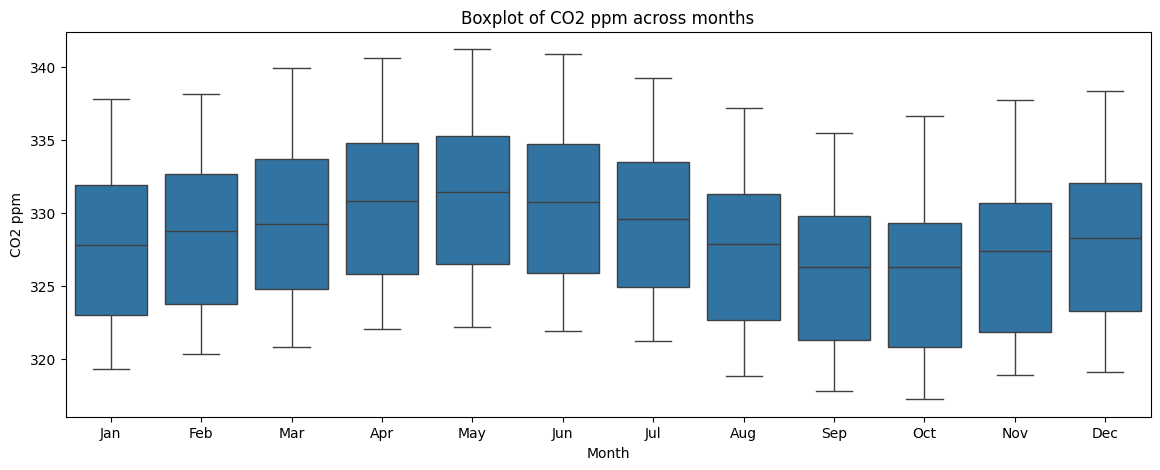

In [240]:
sns.boxplot(df1, x='Month', y='CO2 ppm')
plt.title('Boxplot of CO2 ppm across months')
plt.show()

### Plot a boxplot to understand the variation of Carbon Dioxide in parts per million across years.

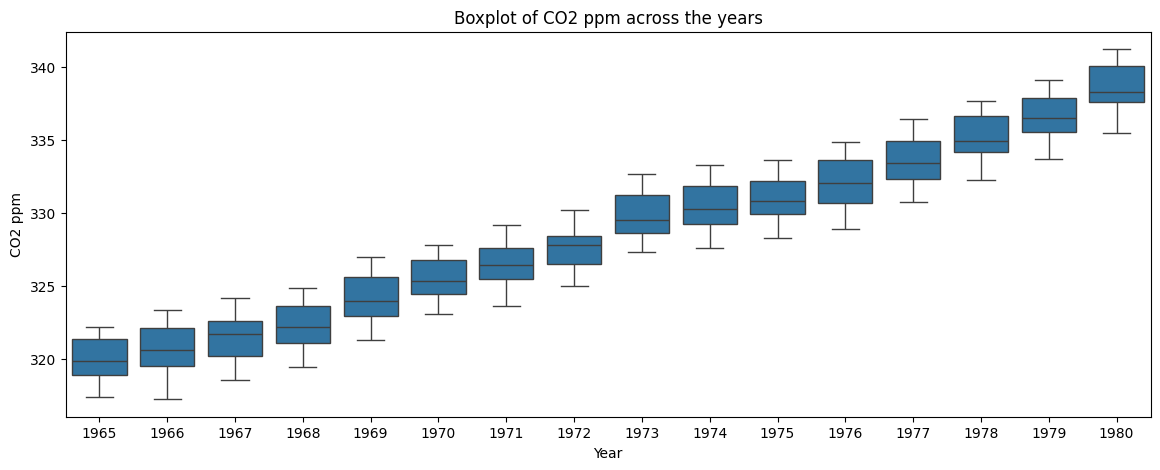

In [241]:
sns.boxplot(df1, x='Year', y='CO2 ppm')
plt.title('Boxplot of CO2 ppm across the years')
plt.show()

### Plot a graph of monthly Carbon Dioxide in parts per million across years.

In [242]:
df1.pivot_table(index='Year', columns='Month', values='CO2 ppm')

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1965,322.06,318.81,319.09,320.36,319.32,321.20,321.95,320.82,322.17,318.93,317.37,317.82
1966,323.03,319.64,320.26,320.98,319.94,321.65,323.11,321.81,323.36,319.06,317.25,317.86
1967,323.67,320.29,321.25,321.81,321.65,321.93,323.39,322.36,324.17,319.98,318.60,318.58
1968,324.23,321.34,321.92,322.47,321.88,323.47,324.75,323.17,324.88,320.45,319.45,319.56
1969,326.31,323.12,323.72,324.21,323.40,325.37,326.24,325.33,327.01,322.31,321.31,321.85
1970,327.80,324.63,325.09,325.57,324.60,326.28,327.54,326.55,327.80,323.99,323.11,323.12
1971,327.92,325.62,326.25,326.61,326.12,327.52,328.80,327.16,329.14,325.10,323.80,323.61
1972,329.91,326.39,327.71,327.83,326.93,328.11,329.25,327.95,330.22,326.54,325.32,324.97
1973,331.69,329.36,328.79,329.69,328.73,331.03,332.24,330.47,332.65,328.28,327.29,327.60


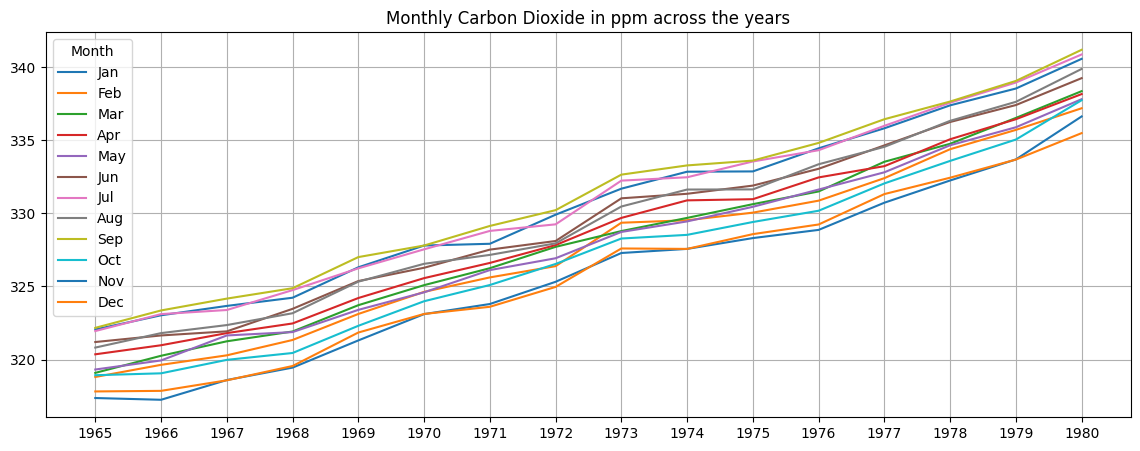

In [243]:
plt.plot(df1.pivot_table(index='Year', columns='Month', values='CO2 ppm'))
plt.title('Monthly Carbon Dioxide in ppm across the years')
plt.legend(df1['Month'].unique(), title='Month', loc='best')
plt.grid()
plt.show()

### Decompose the Time Series to understand the various components.

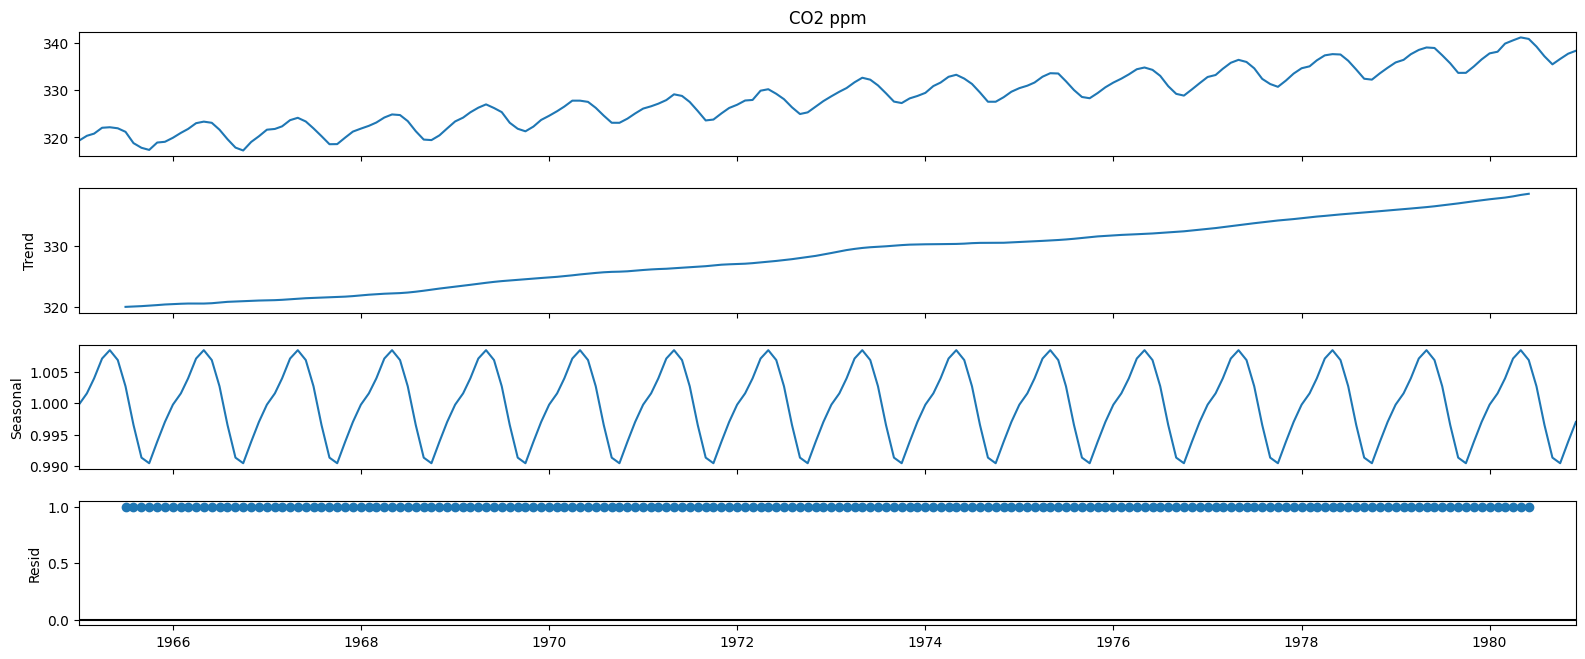

In [244]:
decompose = seasonal_decompose(df['CO2 ppm'], model='multiplicative')
fig = decompose.plot()
fig.set_size_inches(16,7)
plt.show()

### Plot a graph of the average and percentage change of Carbon Dioxide in parts per million across years.

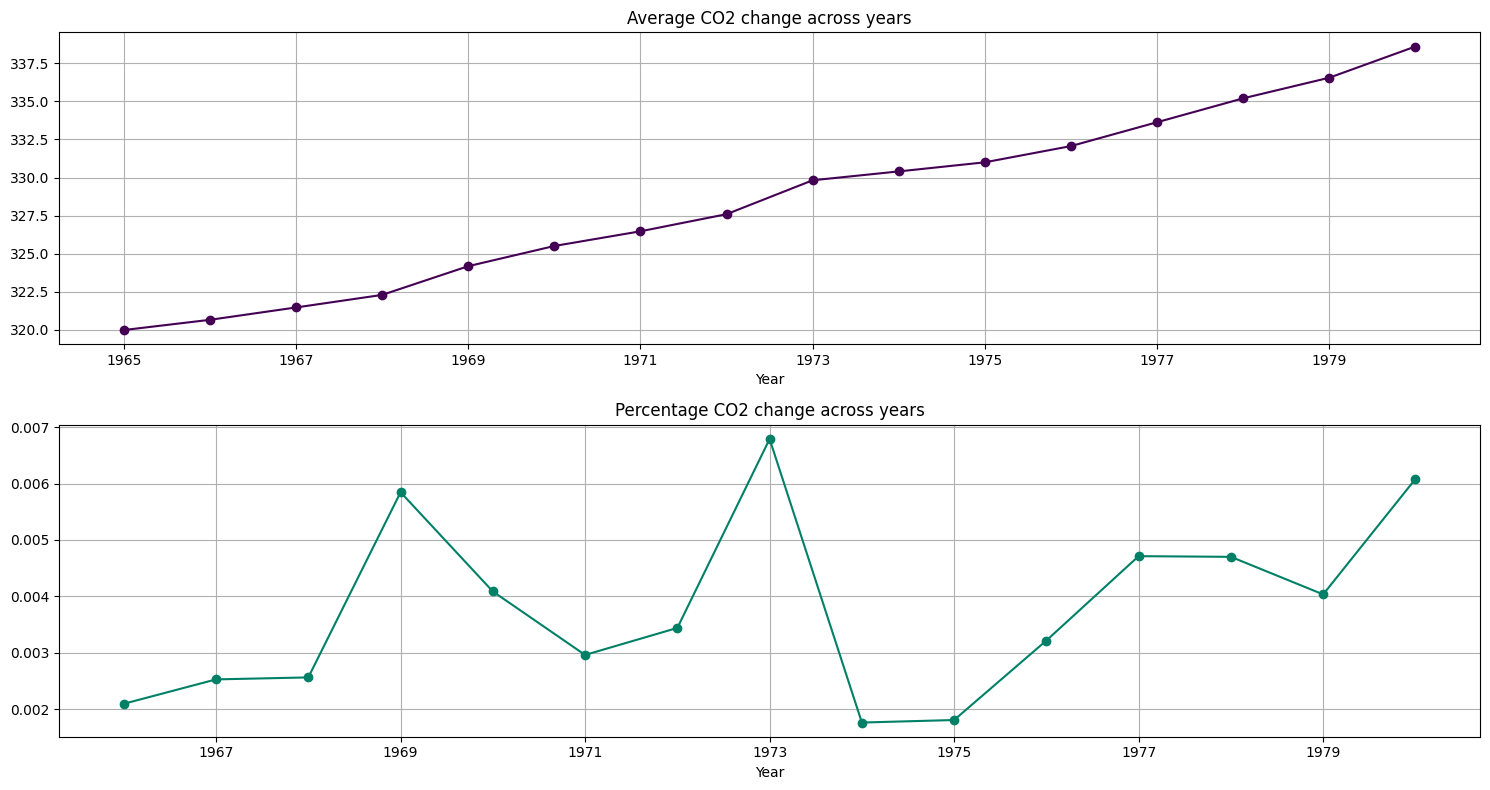

In [245]:
#df1.groupby('Year')['CO2 ppm'].mean()
#df1.groupby('Year')['CO2 ppm'].sum().pct_change()*100

fig,ax = plt.subplots(2,1,figsize=(15,8))
df1.groupby('Year')['CO2 ppm'].mean().plot(ax=ax[0], title='Average CO2 change across years', colormap='viridis', marker='o', grid=True)
df1.groupby('Year')['CO2 ppm'].sum().pct_change().plot(ax=ax[1], title='Percentage CO2 change across years', colormap='summer', marker='o', grid=True)

plt.tight_layout()
plt.show()

### Split the data into train and test. The first 75% of the data should be in training and last 25% of the data should be in test

In [246]:
train = df.iloc[0:int(0.75*(len(df)))]
test = df.iloc[int(0.75*(len(df))):]

In [247]:
len(df)

192

In [248]:
len(train)

144

In [249]:
len(test)

48

### Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05. 
### If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at $\alpha$ = 0.05.

In [250]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train['CO2 ppm'])
print('ADF test statistic is %3.3f' %dftest[0])
print('ADF test p-value is %1.4f' %dftest[1])

ADF test statistic is -0.258
ADF test p-value is 0.9313


#### As P-value is very higher than significance level of 5%, we can't reject $H_0$. That means there is enough statistical evidence to say that TS is not stationary.

#### Checking for Rolling Average

In [251]:
dftest = adfuller(train['CO2 ppm'].rolling(7).mean().dropna())
print('ADF test statistic is %3.3f' %dftest[0])
print('ADF test p-value is %1.4f' %dftest[1])

ADF test statistic is -0.565
ADF test p-value is 0.8787


### Still, TS is not stationary.

##### Going forward, for all the questions 'training data' means the data on which the model will be built and which is stationary in nature.

### Check the ACF and PACF of the training data.

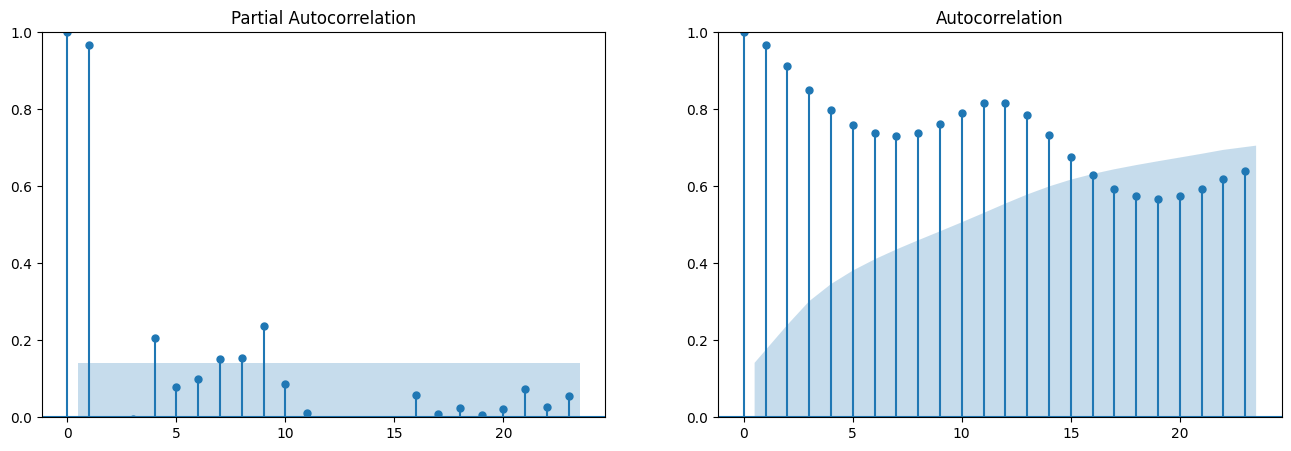

In [252]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

plot_pacf(df['CO2 ppm'], ax=ax[0])
ax[0].set_ylim(0,1)
plot_acf(df['CO2 ppm'], ax=ax[1])
ax[1].set_ylim(0,1)
plt.show()

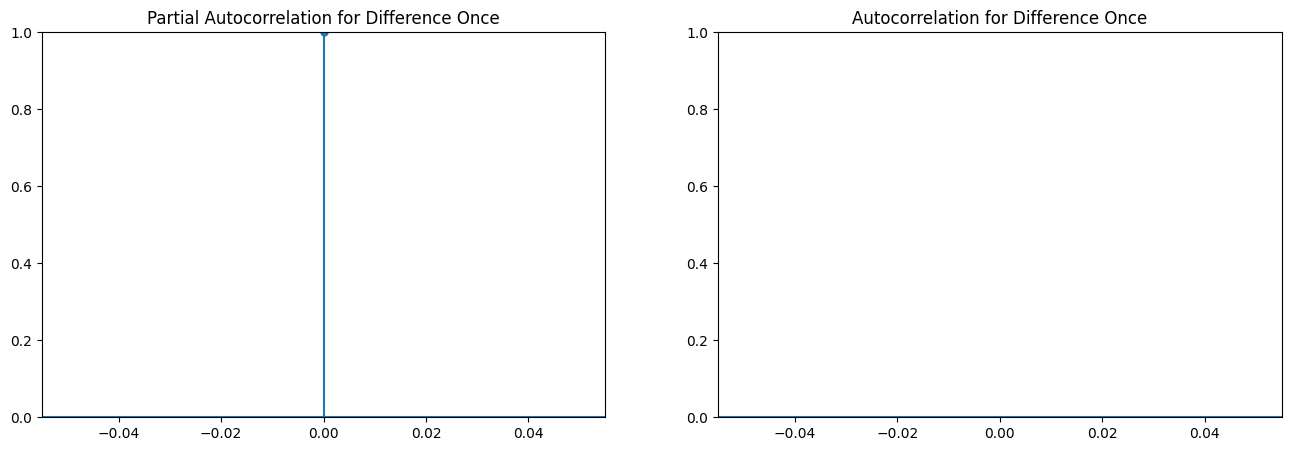

In [253]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

plot_pacf(df['CO2 ppm'].diff(), ax=ax[0])
ax[0].set_ylim(0,1)
ax[0].set_title('Partial Autocorrelation for Difference Once')
plot_acf(df['CO2 ppm'].diff(), ax=ax[1])
ax[1].set_ylim(0,1)
ax[1].set_title('Autocorrelation for Difference Once')
plt.show()

### Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
### [Here we have taken the range of values of p and q to be between 0 and 2]

In [254]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(train['CO2 ppm'], trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=445.908, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=354.481, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=365.315, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=444.712, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=322.507, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=307.465, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=308.613, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=309.626, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=306.235, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=320.973, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=307.504, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=286.565, Time=0.1

In [255]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,1))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -138.500
Date:                Sun, 31 Dec 2023   AIC                            285.001
Time:                        11:25:15   BIC                            296.852
Sample:                    01-01-1965   HQIC                           289.817
                         - 12-01-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5291      0.054     28.213      0.000       1.423       1.635
ar.L2         -0.8274      0.054    -15.320      0.000      -0.933      -0.722
ma.L1         -0.8291      0.066    -12.484      0.0

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [256]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [257]:
pred

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657146
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169825
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479460
1978-02-01    332.533652
1978-03-01    332.395659
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556102
1978-08-01    331.586488
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027446
1978-12-01    332.119943
1979-01-01    332.137074
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791566
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


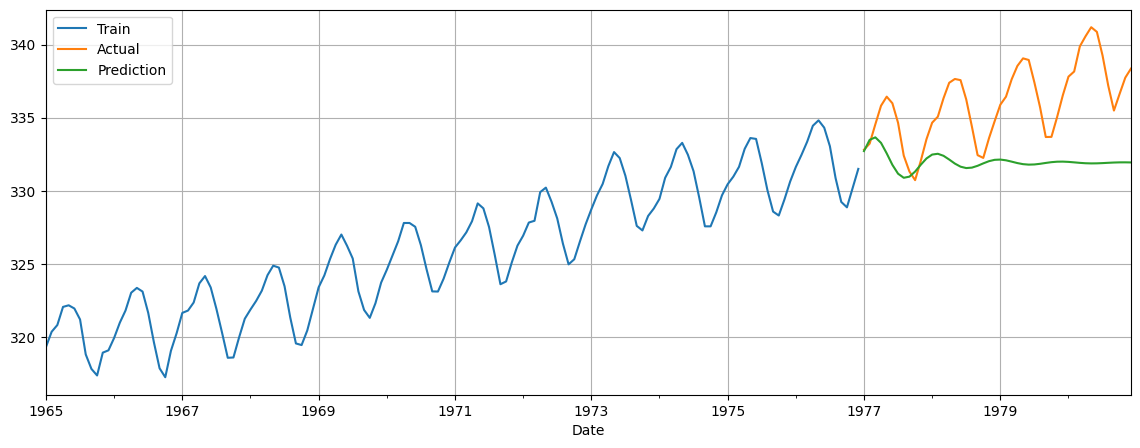

In [258]:
train['CO2 ppm'].plot()
test['CO2 ppm'].plot()
pred.plot()

plt.grid()
plt.legend(['Train','Actual','Prediction'])
plt.show()

In [259]:
rmse = mean_squared_error(test['CO2 ppm'], pred, squared=False)
mape = mean_absolute_percentage_error(test['CO2 ppm'], pred)
print('RMSE:',rmse)
print('MAPE:',mape)

b = pd.DataFrame(columns=['RMSE','MAPE'])
b.loc['ARIMA(2,1,1)'] = [rmse,mape]

RMSE: 4.753883509650662
MAPE: 0.011926026607327495


In [260]:
b

,RMSE,MAPE
"ARIMA(2,1,1)",4.753884,0.011926


### Check for stationarity on the whole data and stationarize the data if needed. Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) ARIMA model.
### Note: Stationarity is to be checked with the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05.

In [261]:
dftest = adfuller(df['CO2 ppm'])
print('ADF test statistic is %3.3f' %dftest[0])
print('ADF test p-value is %1.4f' %dftest[1])

ADF test statistic is 1.270
ADF test p-value is 0.9964


#### Again, TS is not stationary

In [262]:
stepwise_fit = auto_arima(df['CO2 ppm'], trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=600.204, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=478.372, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=493.940, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=599.628, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=436.530, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=415.610, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=417.276, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=417.764, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=414.816, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=435.252, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=416.587, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=390.892, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             :

In [263]:
model = ARIMA(df['CO2 ppm'], order=(2,1,1))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  192
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -190.652
Date:                Sun, 31 Dec 2023   AIC                            389.305
Time:                        11:25:19   BIC                            402.314
Sample:                    01-01-1965   HQIC                           394.574
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5236      0.047     32.128      0.000       1.431       1.617
ar.L2         -0.8195      0.051    -16.209      0.000      -0.919      -0.720
ma.L1         -0.8203      0.061    -13.461      0.0

In [264]:
pred = model.predict(start=pd.to_datetime('1981-01-01'),end=pd.to_datetime('1982-12-01'),typ = 'level',dynamic=True,full_results=True)

In [265]:
pred

1981-01-01    338.805850
1981-02-01    338.977067
1981-03-01    338.872567
1981-04-01    338.573043
1981-05-01    338.202324
1981-06-01    337.882954
1981-07-01    337.700158
1981-08-01    337.683370
1981-09-01    337.807588
1981-10-01    338.010605
1981-11-01    338.218126
1981-12-01    338.367935
1982-01-01    338.426125
1982-02-01    338.392017
1982-03-01    338.292365
1982-04-01    338.168486
1982-05-01    338.061407
1982-06-01    337.999780
1982-07-01    337.993633
1982-08-01    338.034769
1982-09-01    338.102483
1982-10-01    338.171940
1982-11-01    338.222275
1982-12-01    338.242046
Freq: MS, Name: predicted_mean, dtype: float64

In [266]:
# 95% Confidence Interval
pred95 = model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [267]:
pred_ci_95

,lower CO2 ppm,upper CO2 ppm
1981-01-01,337.526280,340.085419
1981-02-01,336.449703,341.504430
1981-03-01,335.316172,342.428962
1981-04-01,334.361428,342.784658
1981-05-01,333.691009,342.713639
1981-06-01,333.293252,342.472656
1981-07-01,333.106449,342.293868
1981-08-01,333.086519,342.280220
1981-09-01,333.206972,342.408205
1981-10-01,333.409192,342.612018


### Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

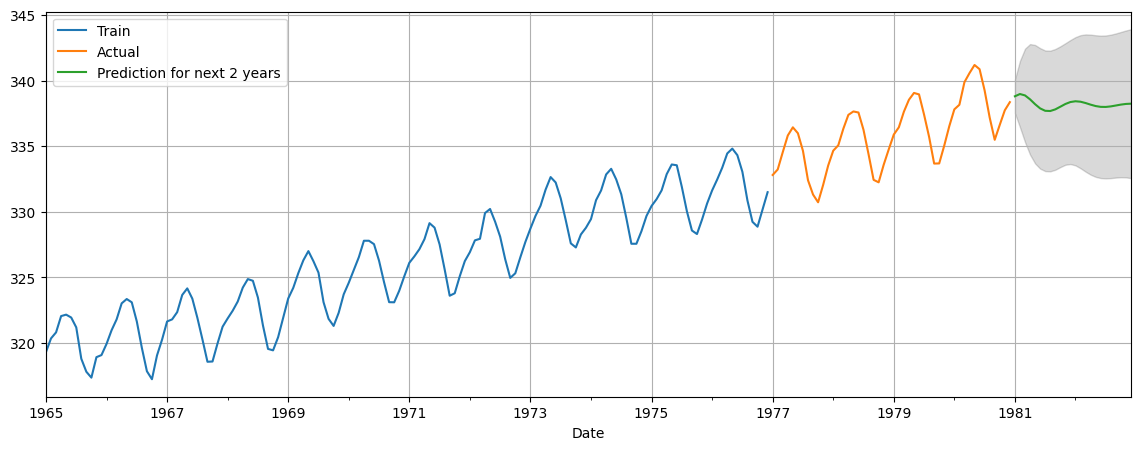

In [268]:
train['CO2 ppm'].plot()
test['CO2 ppm'].plot()
pred.plot()

plt.fill_between(x=pred_ci_95.index, y1=pred_ci_95['lower CO2 ppm'], y2=pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
plt.grid()
plt.legend(['Train','Actual','Prediction for next 2 years'])
plt.show()

### Build an Automated version of an SARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
### [Here we have taken the range of values of p,q,P and Q to be between 0 and 2]

In [269]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [270]:
a = pd.DataFrame(columns=['param','seasonal', 'AIC'])
a


,param,seasonal,AIC


In [271]:
for i in pdq:
    for j in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values, order=i, seasonal_order=j, enforce_stationarity=False, enforce_invertibility=False)
        model = model.fit(maxiter=100)
        print(f"SARIMA{i}x{j}7 - AIC: {model.aic}")
        a.loc[len(a.index)] = [i,j,model.aic]

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC: 441.780622052286
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC: 322.99687478668557


SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC: 232.00849360946395
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC: 151.72863156969532
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC: 90.95070210739175
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC: 62.413950811599854
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC: 93.02503211471367
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC: 66.07400540326854
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC: 62.91057989586294
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC: 358.6597354199449
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC: 284.8604635312634
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC: 209.13648708928173
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC: 151.734368453407
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC: 84.83368666704503
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC: 65.43056347065647
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC: 92.63486090653322
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC: 63.535256635114955
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC: 63.87633726297785
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC: 325.1005093302217
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC: 260.00

In [272]:
a.sort_values(by=['AIC']).iloc[0]

param           (1, 1, 0)
seasonal    (1, 0, 2, 12)
AIC             62.004003
Name: 32, dtype: object

In [273]:
model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values, order=(1,1,0), seasonal_order=(1,0,2,12), enforce_stationarity=False, enforce_invertibility=False)
model = model.fit()
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -26.002
Date:                                 Sun, 31 Dec 2023   AIC                             62.004
Time:                                         11:26:02   BIC                             75.857
Sample:                                              0   HQIC                            67.629
                                                 - 144                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1409      0.096     -1.466      0.143      -0.329       0

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [274]:
pred = model.forecast(len(test))
pred = pd.DataFrame(pred, index=test.index, columns=['CO2 ppm'])

In [275]:
pred.head()

,CO2 ppm
Date,
1977-01-01,332.381548
1977-02-01,333.136755
1977-03-01,333.801929
1977-04-01,334.976758
1977-05-01,335.545635


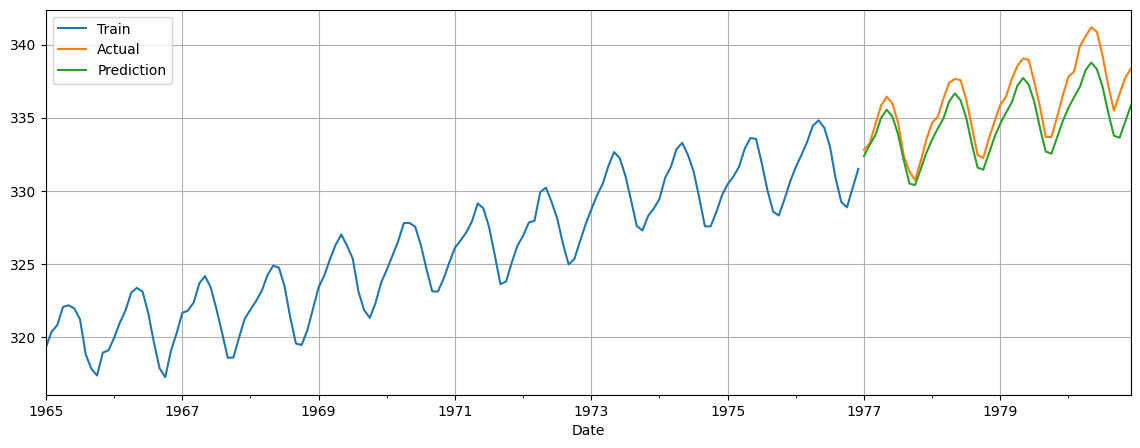

In [276]:
train['CO2 ppm'].plot()
test['CO2 ppm'].plot()
pred['CO2 ppm'].plot()

plt.grid()
plt.legend(['Train','Actual','Prediction'])
plt.show()

In [277]:
rmse = mean_squared_error(test['CO2 ppm'], pred, squared=False)
mape = mean_absolute_percentage_error(test['CO2 ppm'], pred)
print('RMSE:',rmse)
print('MAPE:',mape)

b.loc['SARIMA(1,1,0)(1,0,2,12)'] = [rmse,mape]

RMSE: 1.5276181452947555
MAPE: 0.004043853627620448


In [278]:
b

,RMSE,MAPE
"ARIMA(2,1,1)",4.753884,0.011926
"SARIMA(1,1,0)(1,0,2,12)",1.527618,0.004044


### Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [279]:
model = sm.tsa.statespace.SARIMAX(df['CO2 ppm'].values, order=(1,1,0), seasonal_order=(1,0,2,12), enforce_stationarity=False, enforce_invertibility=False)
model = model.fit()
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -45.995
Date:                                 Sun, 31 Dec 2023   AIC                            101.990
Time:                                         11:26:03   BIC                            117.550
Sample:                                              0   HQIC                           108.306
                                                 - 192                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2290      0.082     -2.798      0.005      -0.389      -0

### Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [280]:
pd.date_range(start='1981-01-01', periods=24, freq='MS')

DatetimeIndex(['1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
               '1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
               '1981-09-01', '1981-10-01', '1981-11-01', '1981-12-01',
               '1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01', '1982-11-01', '1982-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [281]:
pred = model.get_forecast(steps=24)
pred = pred.predicted_mean

In [282]:
pred

array([339.56809921, 340.16919217, 341.21791307, 342.30362443,
       342.84658838, 342.48183482, 341.10730086, 339.18140433,
       337.48941942, 337.5035239 , 338.71622854, 339.87012889,
       340.95434217, 341.58548642, 342.62335273, 343.71333645,
       344.25550968, 343.89049864, 342.51741828, 340.59219691,
       338.9000382 , 338.90657267, 340.12012625, 341.27777619])

In [283]:
pred = pd.DataFrame({'CO2 ppm':pred}, index=pd.date_range(start='1981-01-01', periods=24, freq='MS'))
pred

,CO2 ppm
1981-01-01,339.568099
1981-02-01,340.169192
1981-03-01,341.217913
1981-04-01,342.303624
1981-05-01,342.846588
1981-06-01,342.481835
1981-07-01,341.107301
1981-08-01,339.181404
1981-09-01,337.489419
1981-10-01,337.503524


In [284]:
pred95 = model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [285]:
pred_ci_95

array([[338.96961761, 340.1665808 ],
       [339.41371708, 340.92466725],
       [340.31602756, 342.11979858],
       [341.27942154, 343.32782732],
       [341.71248369, 343.98069306],
       [341.24772514, 343.71594451],
       [339.78067191, 342.43392981],
       [337.76830749, 340.59450118],
       [335.99484743, 338.98399142],
       [335.93169466, 339.07535315],
       [337.07076534, 340.36169175],
       [338.1541886 , 341.58606918],
       [339.14427907, 342.76440527],
       [339.69232211, 343.47865074],
       [340.64918652, 344.59751894],
       [341.66167143, 345.76500147],
       [342.12910052, 346.38191884],
       [341.69189996, 346.08909732],
       [340.24892283, 344.78591373],
       [338.25589565, 342.92849817],
       [336.49784414, 341.30223227],
       [336.44024566, 341.37289968],
       [337.59129223, 342.64896028],
       [338.68794335, 343.86760903]])

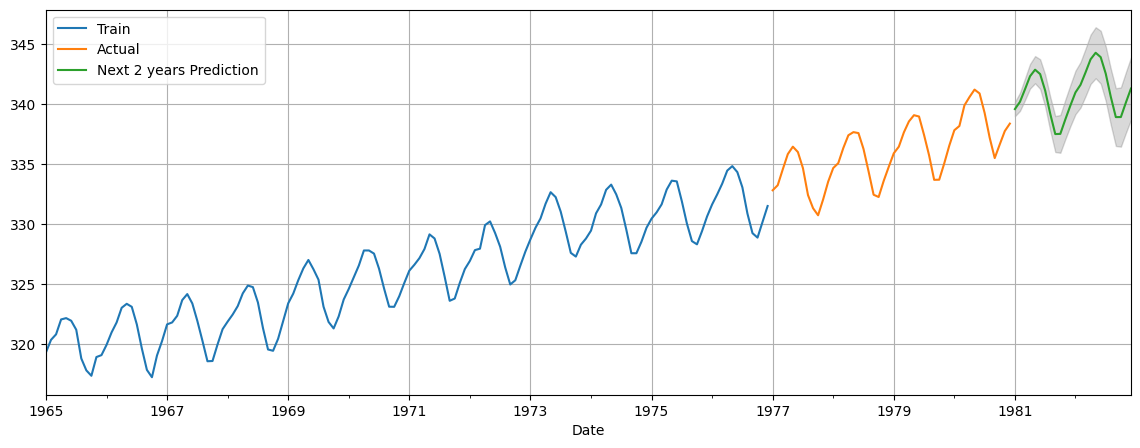

In [286]:
train['CO2 ppm'].plot()
test['CO2 ppm'].plot()
pred['CO2 ppm'].plot()

plt.fill_between(x=pred.index, y1=pred_ci_95[:,0], y2=pred_ci_95[:,1], color='k', alpha=.15)
plt.grid()
plt.legend(['Train','Actual','Next 2 years Prediction'])
plt.show()

### Build a model on the training data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model. Consider a degree of differencing on the Seasonal scale as well.

In [287]:
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [288]:
a = pd.DataFrame(columns=['param','seasonal', 'AIC'])
a

,param,seasonal,AIC


In [289]:
for i in pdq:
    for j in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values, order=i, seasonal_order=j, enforce_stationarity=False, enforce_invertibility=False)
        model = model.fit(maxiter=100)
        print(f"SARIMA{i}x{j}7 - AIC: {model.aic}")
        a.loc[len(a.index)] = [i,j,model.aic]

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC: 153.2062431783026


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC: 65.42885332599661
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC: 51.13488255283771
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC: 92.83358561702188
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC: 60.08360741898267
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC: 51.61940090467459
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC: 68.9073198242714
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC: 55.75059902087864
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC: 53.8116215353469
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC: 150.8929430287859
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC: 59.90722165478224
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC: 54.50734724081956
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC: 91.90566699350605
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC: 56.67952514278397
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC: 53.90701742625174
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC: 69.00017279264551
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC: 56.16075220622833
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC: 54.210782778905866
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC: 151.1792552

In [290]:
a.sort_values(by=['AIC']).iloc[0]

param           (1, 1, 0)
seasonal    (0, 1, 2, 12)
AIC             50.786119
Name: 29, dtype: object

In [291]:
model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values, order=(1,1,0), seasonal_order=(0,1,2,12), enforce_stationarity=False, enforce_invertibility=False)
model = model.fit()
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -21.393
Date:                                 Sun, 31 Dec 2023   AIC                             50.786
Time:                                         11:27:42   BIC                             61.440
Sample:                                              0   HQIC                            55.104
                                                 - 144                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1483      0.093     -1.601      0.109      -0.330       0

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [292]:
pred = model.forecast(len(test))
pred = pd.DataFrame(pred, index=test.index, columns=['CO2 ppm'])

In [293]:
pred.head()

,CO2 ppm
Date,
1977-01-01,332.420130
1977-02-01,333.210509
1977-03-01,333.904343
1977-04-01,335.130919
1977-05-01,335.725437


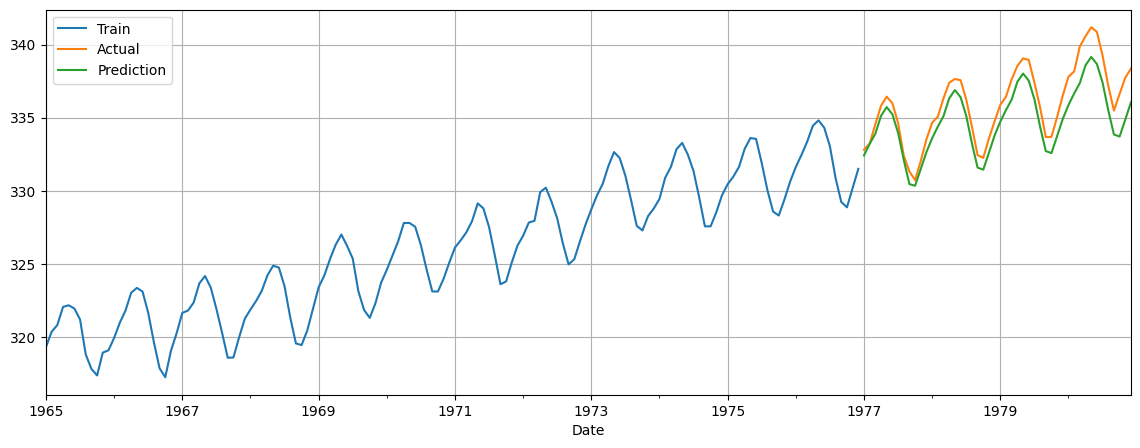

In [294]:
train['CO2 ppm'].plot()
test['CO2 ppm'].plot()
pred['CO2 ppm'].plot()

plt.grid()
plt.legend(['Train','Actual','Prediction'])
plt.show()

In [295]:
rmse = mean_squared_error(test['CO2 ppm'], pred, squared=False)
mape = mean_absolute_percentage_error(test['CO2 ppm'], pred)
print('RMSE:',rmse)
print('MAPE:',mape)

b.loc['SARIMA_SEASDIFF(1,1,0)(0,1,2,12)'] = [rmse,mape]

RMSE: 1.3731664222998006
MAPE: 0.0036172674217251244


In [296]:
b

,RMSE,MAPE
"ARIMA(2,1,1)",4.753884,0.011926
"SARIMA(1,1,0)(1,0,2,12)",1.527618,0.004044
"SARIMA_SEASDIFF(1,1,0)(0,1,2,12)",1.373166,0.003617


### SARIMA with Seasonal Difference performed well

### Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [297]:
model = sm.tsa.statespace.SARIMAX(df['CO2 ppm'].values, order=(1,1,0), seasonal_order=(0,1,2,12), enforce_stationarity=False, enforce_invertibility=False)
model = model.fit()
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -40.590
Date:                                 Sun, 31 Dec 2023   AIC                             89.181
Time:                                         11:27:46   BIC                            101.328
Sample:                                              0   HQIC                            94.115
                                                 - 192                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2441      0.083     -2.937      0.003      -0.407      -0

### Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [298]:
model.forecast(24)

array([339.57346692, 340.17354282, 341.21403519, 342.30281748,
       342.84559217, 342.47855818, 341.1083212 , 339.18494126,
       337.49521063, 337.50043718, 338.71219018, 339.86851561,
       340.9501298 , 341.58318223, 342.61353152, 343.70557711,
       344.24762264, 343.88054631, 342.51112564, 340.58821785,
       338.89851647, 338.89989937, 340.11199866, 341.27014465])

In [299]:
pred = pd.DataFrame({'CO2 ppm':model.forecast(24)}, index=pd.date_range(start='1981-01-01', periods=24, freq='MS'))
pred

,CO2 ppm
1981-01-01,339.573467
1981-02-01,340.173543
1981-03-01,341.214035
1981-04-01,342.302817
1981-05-01,342.845592
1981-06-01,342.478558
1981-07-01,341.108321
1981-08-01,339.184941
1981-09-01,337.495211
1981-10-01,337.500437


In [300]:
pred95 = model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

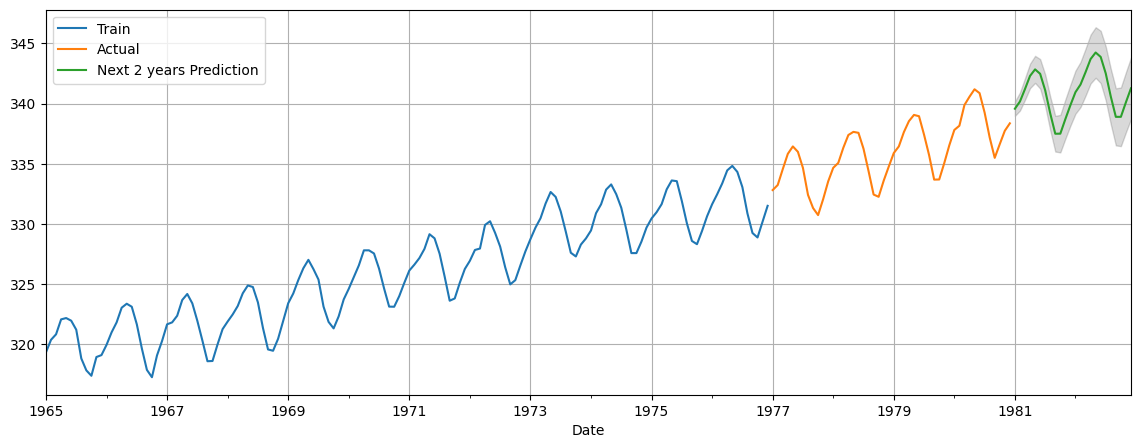

In [301]:
train['CO2 ppm'].plot()
test['CO2 ppm'].plot()
pred['CO2 ppm'].plot()

plt.fill_between(x=pred.index, y1=pred_ci_95[:,0], y2=pred_ci_95[:,1], color='k', alpha=.15)
plt.grid()
plt.legend(['Train','Actual','Next 2 years Prediction'])
plt.show()

### END